In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train= pd.read_csv('Train.csv')
df_test= pd.read_csv('Test.csv')

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

In [12]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [16]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Selecting features based on general requirements(Droping independent columns)

In [18]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [19]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<Axes: xlabel='Outlet_Type', ylabel='count'>

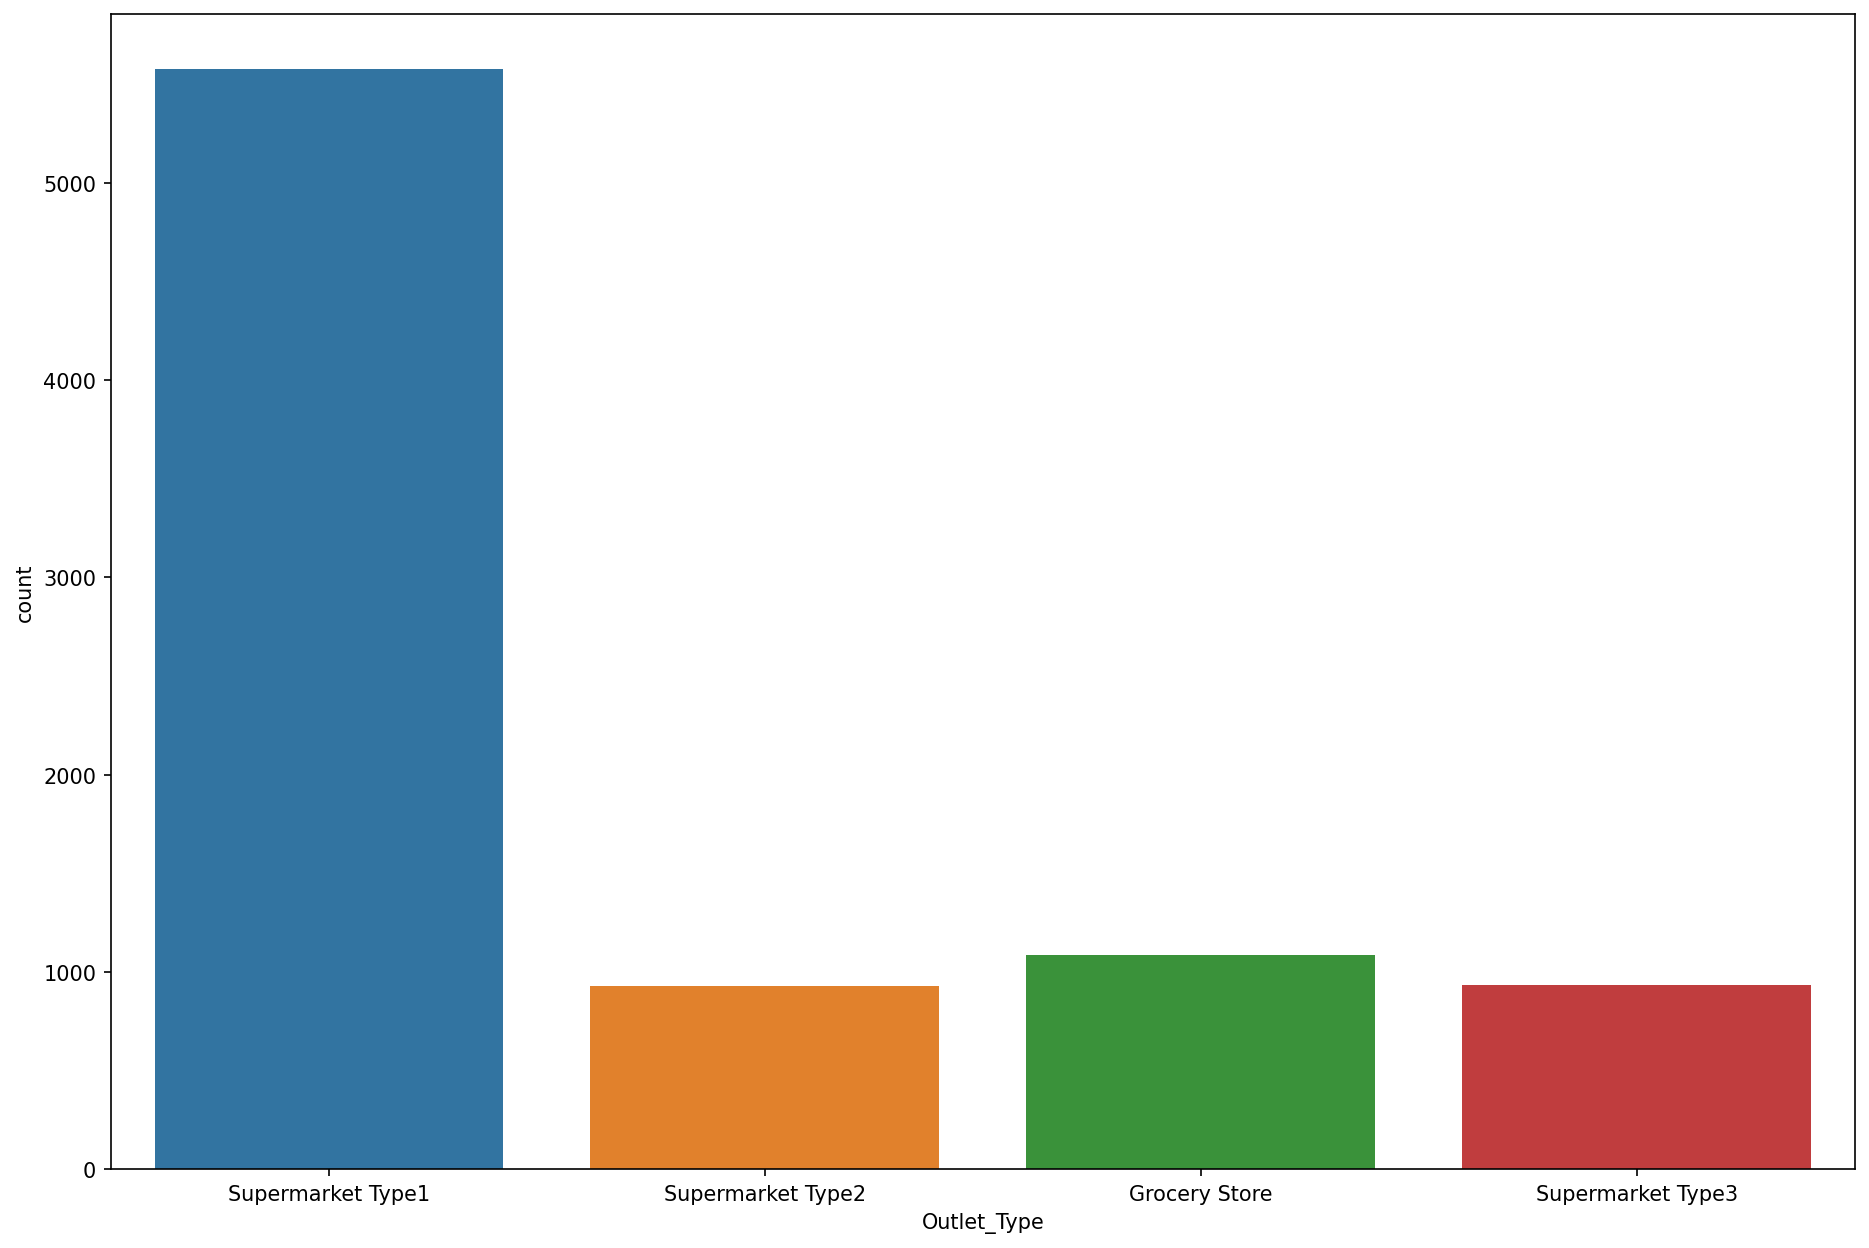

In [20]:
plt.figure(figsize=(15,10), dpi=150)
sns.countplot(df_train, x='Outlet_Type')

<Axes: xlabel='Outlet_Type', ylabel='count'>

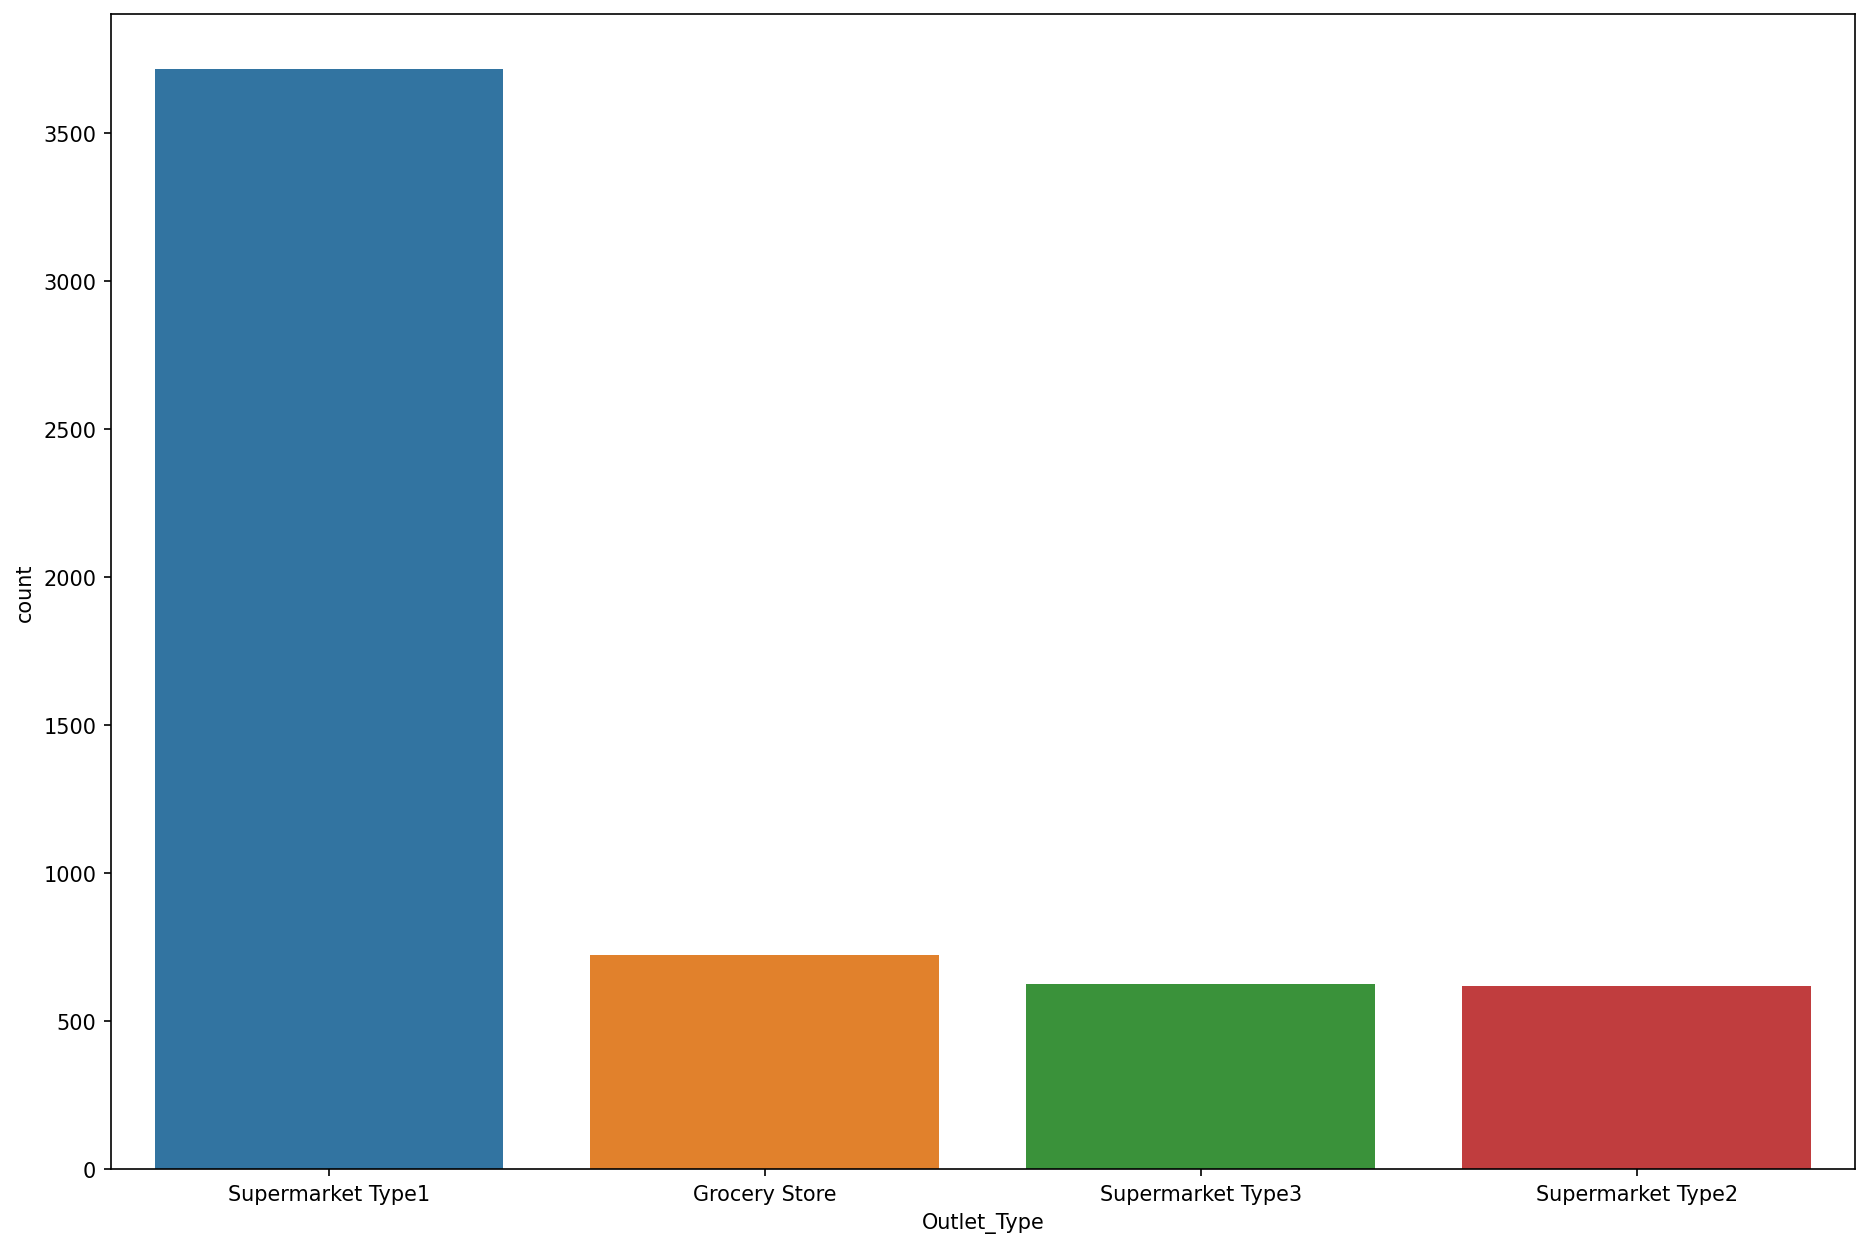

In [21]:
plt.figure(figsize=(15,10), dpi=150)
sns.countplot(df_test, x='Outlet_Type')

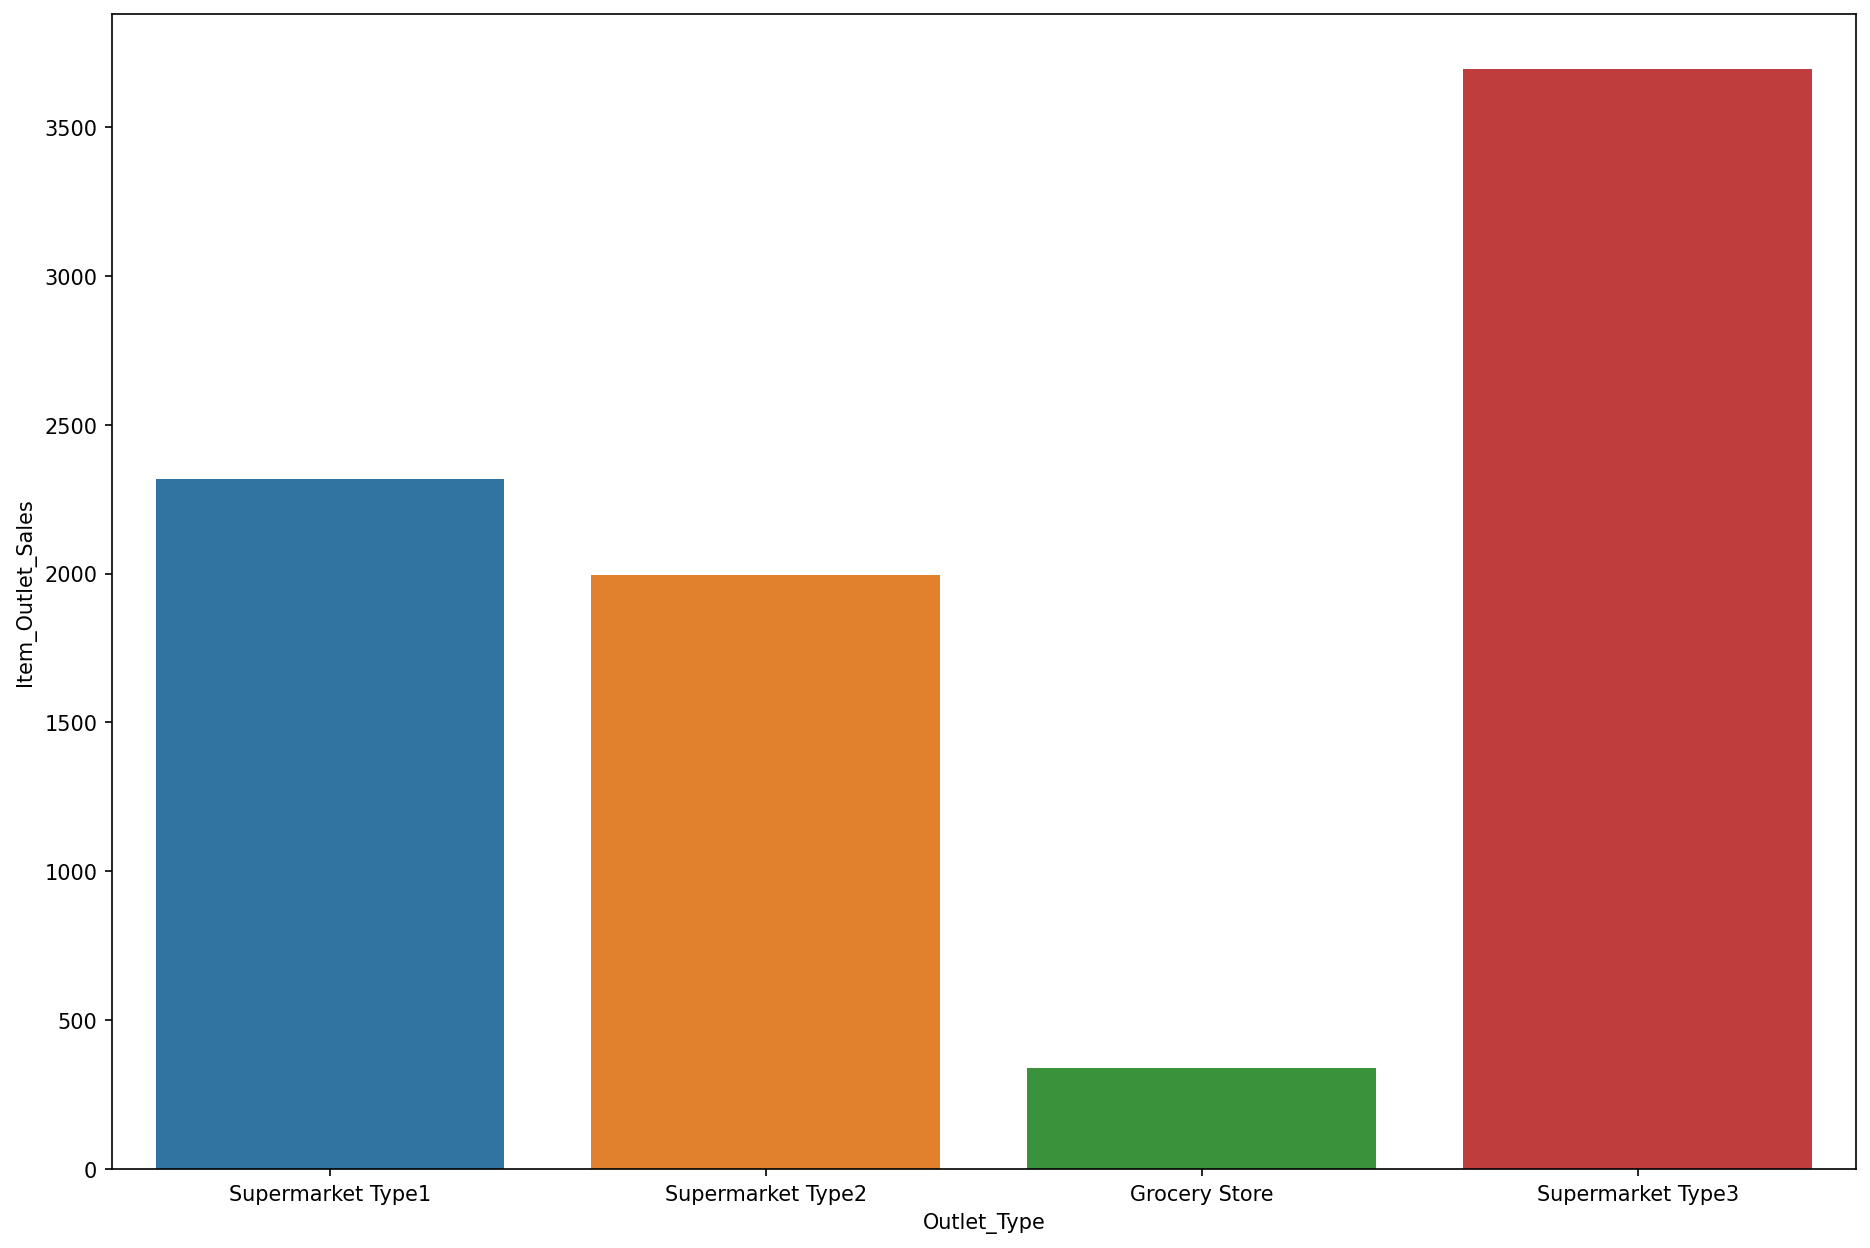

In [22]:
plt.figure(figsize=(15,10), dpi=150)
sns.barplot(data= df_train, x='Outlet_Type', y='Item_Outlet_Sales', errorbar=None)
plt.show()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

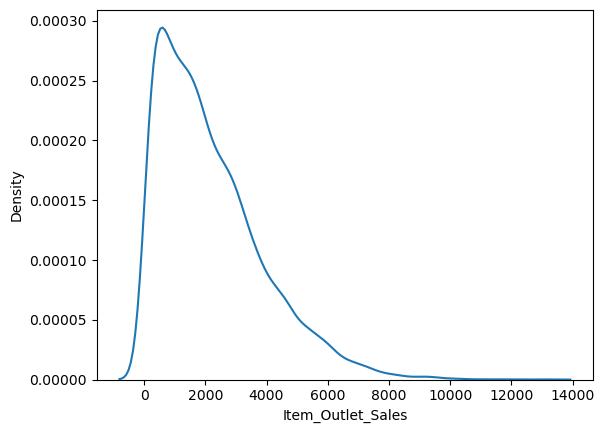

In [23]:
sns.kdeplot(df_train, x='Item_Outlet_Sales')

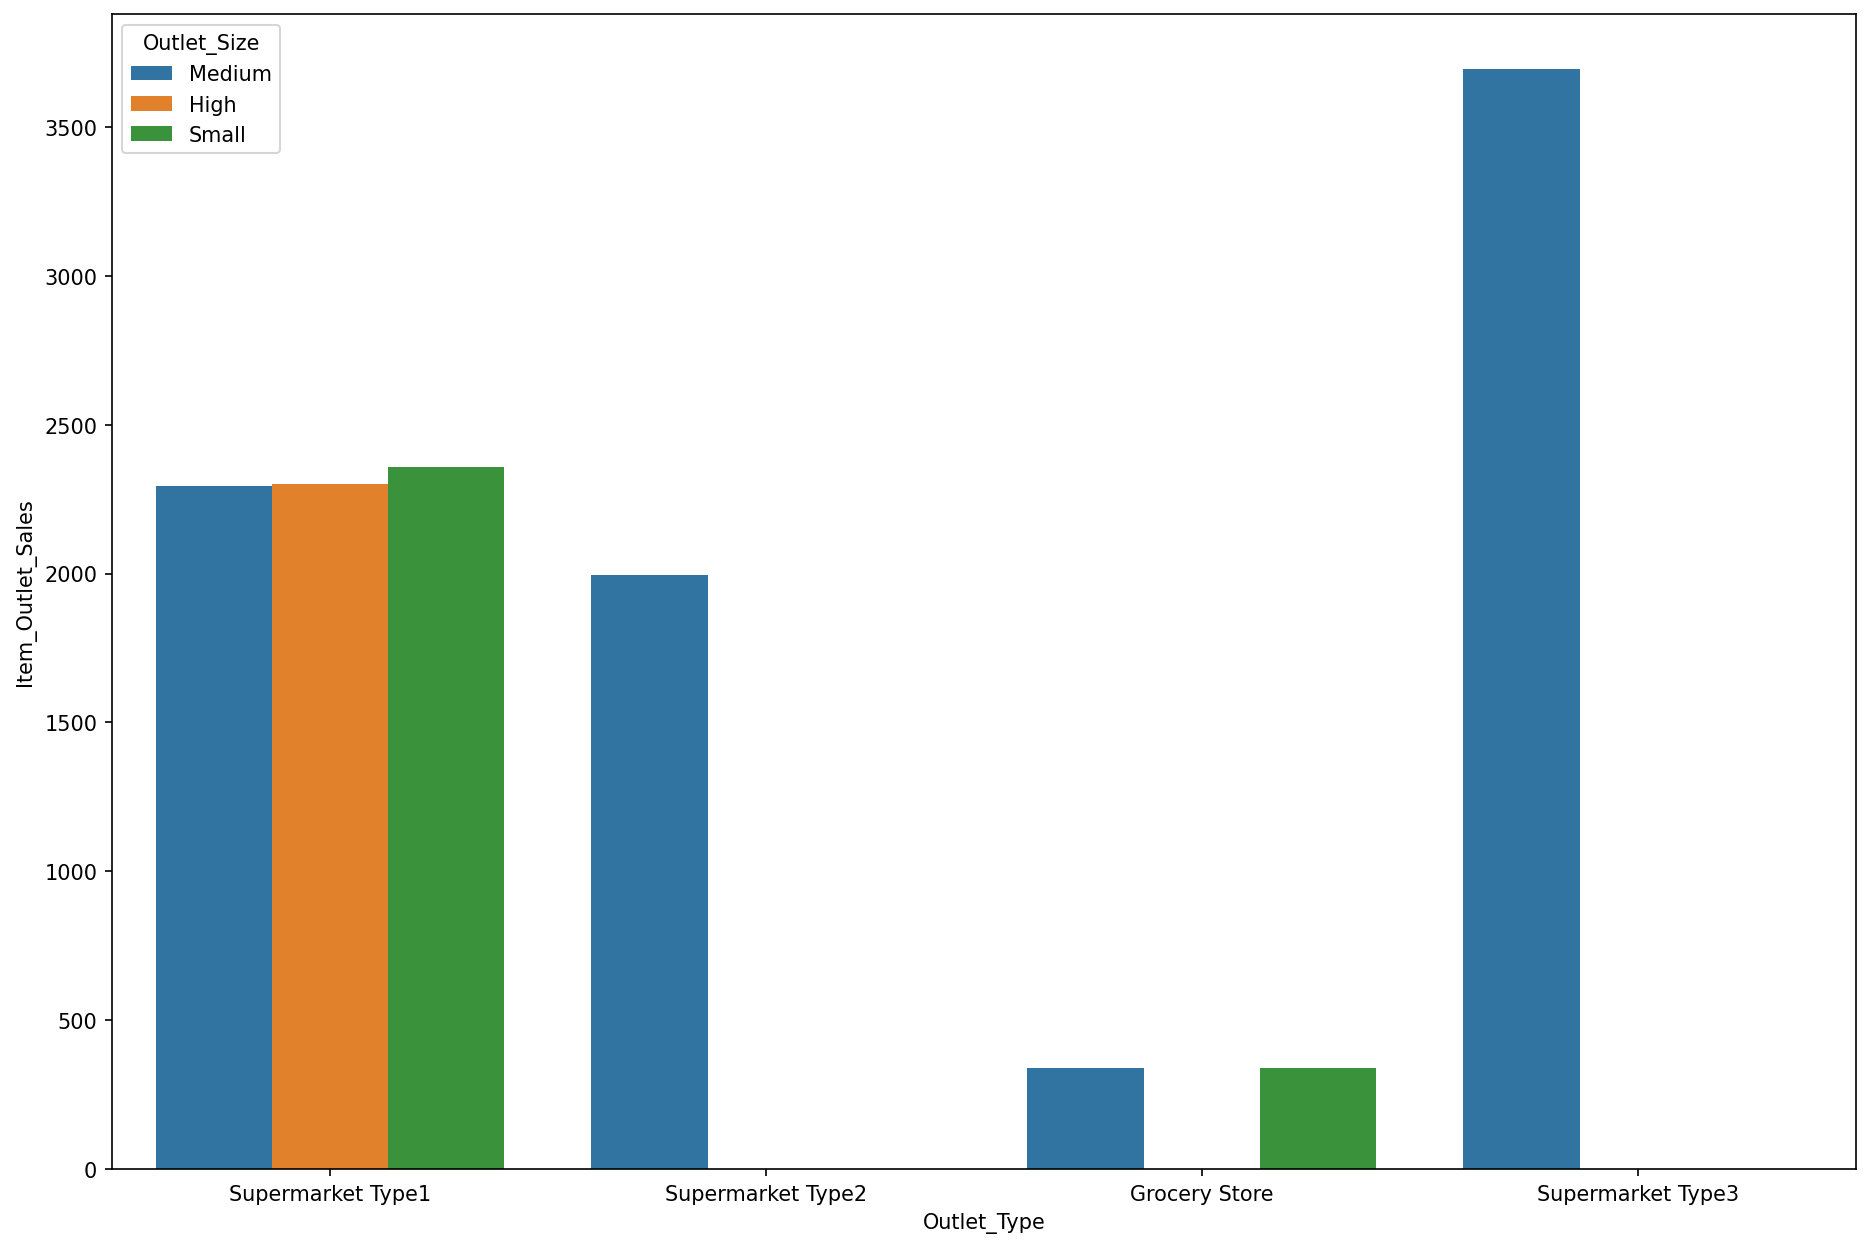

In [24]:
plt.figure(figsize=(15,10), dpi=150)
sns.barplot(data= df_train, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', errorbar=None)
plt.show()

In [25]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

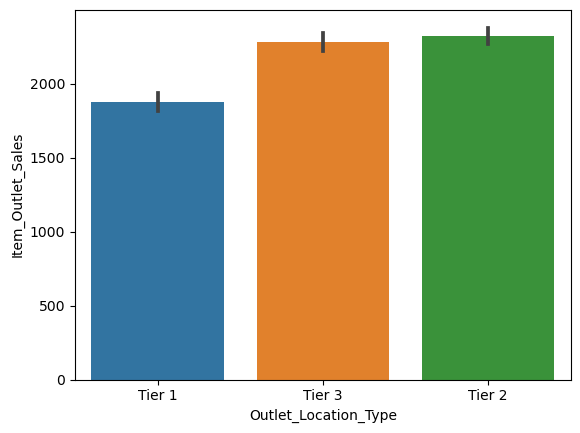

In [27]:
sns.barplot(df_train, x='Outlet_Location_Type',y='Item_Outlet_Sales')

In [28]:
df_train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

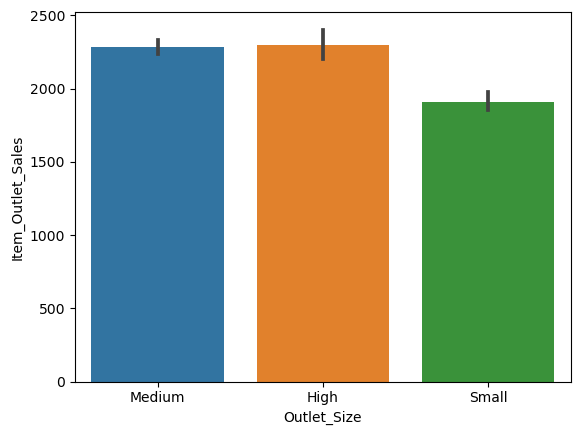

In [29]:
sns.barplot(df_train, x='Outlet_Size', y='Item_Outlet_Sales')

In [30]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

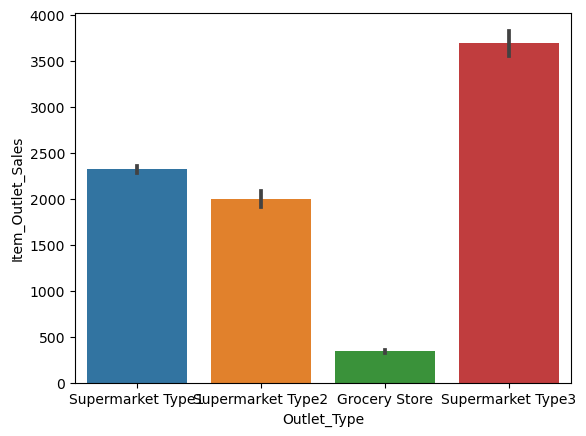

In [31]:
sns.barplot(df_train, x='Outlet_Type', y='Item_Outlet_Sales')

In [32]:
df_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

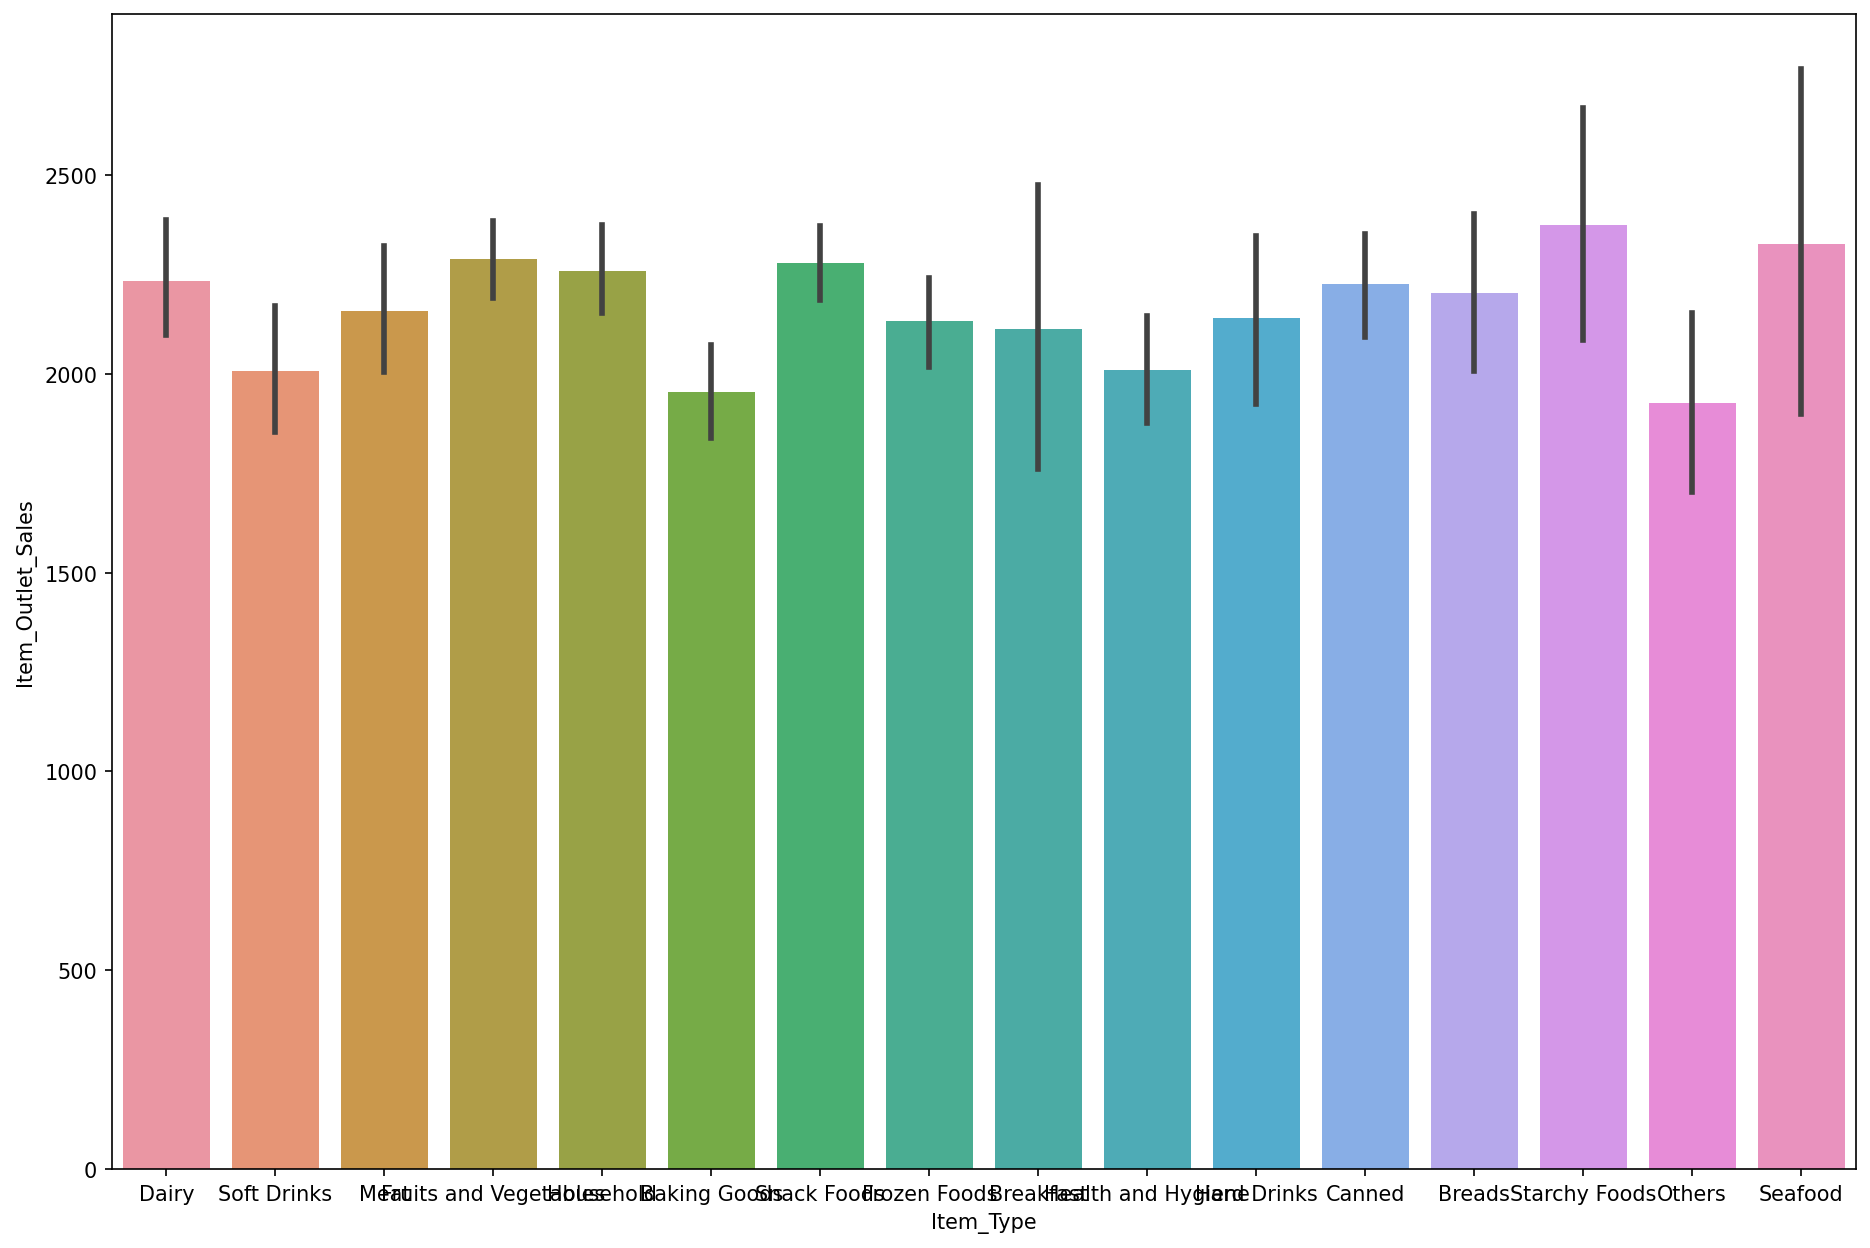

In [33]:
plt.figure(figsize=(15,10), dpi=150)
sns.barplot(df_train, x='Item_Type', y='Item_Outlet_Sales')

EDA using DTALE 

In [34]:
pip install dtale

Note: you may need to restart the kernel to use updated packages.


In [35]:
import dtale

In [36]:
dtale.show(df_train)

In [59]:
pip install pandas_profiling


     -------------------------------------- 324.4/324.4 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 357.6/357.6 kB 7.4 MB/s eta 0:00:00
     -------------------------------------- 296.5/296.5 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
     -------------------------------------- 152.1/152.1 kB 9.5 MB/s eta 0:00:00
     -------------------------------------- 663.4/663.4 kB 5.9 MB/s eta 0:00:00
     -------------------------------------- 381.9/381.9 kB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 7.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27092 sha256=ea0afc28400dd04f5b498a94beaebdd827b7466ae4c1038797e814dda7cad4a0
  Stored in directory: c:\u

In [45]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [43]:
import sys
!{sys.executable} -m pip install pandas-profiling

  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3


In [46]:
from ydata_profiling import ProfileReport

2023-12-06 22:15:04,809 - INFO     - Pandas backend loaded 1.5.3
2023-12-06 22:15:04,859 - INFO     - Numpy backend loaded 1.23.5
2023-12-06 22:15:04,861 - INFO     - Pyspark backend NOT loaded
2023-12-06 22:15:04,862 - INFO     - Python backend loaded


In [47]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [48]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

2023-12-06 22:46:15,665 - INFO     - Executing shutdown due to inactivity...
2023-12-06 22:46:36,037 - INFO     - Executing shutdown...
2023-12-06 22:46:36,052 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


EDA using Klib

In [51]:
pip install klib

Note: you may need to restart the kernel to use updated packages.


In [52]:
import klib

In [53]:
klib.cat_plot(df_train)

GridSpec(6, 5)

In [55]:
klib.corr_mat(df_train) #red in egative value and normal in positive value

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


In [56]:
klib.corr_plot(df_train)  # provides a color-encoded heatmap, ideal for correlations

<Axes: title={'center': 'Feature-correlation (pearson)'}>

In [57]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature


<Axes: xlabel='Item_Weight', ylabel='Density'>

In [58]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values


No missing values found in the dataset.


Data Cleaning Usind Klib Library

In [59]:
klib.data_cleaning(df_train) #cleans the following  from dataset

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [60]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [62]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [63]:
klib.mv_col_handling(df_train) #visualizing , handling, and provides summary statistics of  missing value 

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [1]:
#label encoding, spliting data into train and test, standarization the only we start model building